# BEST NEIGHBORHOOD IN PITTSBURGH  
**Team Bariesilam**

## Introduction  
To answer the question, “What’s the best neighborhood in Pittsburgh?”, we dug into three key dimensions that reflect what makes a community truly thrive: **community engagement**, **education**, and **safety**. Using datasets from the Western Pennsylvania Regional Data Center (WPRDC), we created a composite metric to evaluate neighborhoods across these factors.

Our thought process was simple: the best neighborhood isn’t just the trendiest—it’s the one where people actively engage with their community, where students are receiving support tailored to their needs, and where traffic patterns suggest a safe and walkable environment. These aren’t always the flashiest stats, but they reflect real quality-of-life indicators that matter on a daily basis.

To represent these dimensions, we selected:
- Daily attendance at Pittsburgh’s **community centers** (engagement)  
  [Dataset Link](https://data.wprdc.org/dataset/daily-community-center-attendance)
- Data on **Individualized Education Plans (IEPs)** in Pittsburgh Public Schools (education)  
  [Dataset Link](https://data.wprdc.org/dataset/pittsburgh-public-schools-individualized-education-plan-iep)
- **Traffic count data** on key streets across neighborhoods (safety/walkability)  
  [Dataset Link](https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh)

Each of these datasets provides a lens into how livable, involved, and supportive a neighborhood is. Together, they form a unique picture of what “best” really looks like in Pittsburgh.

---

## The Metric  
We broke our metric into three parts, one for each dataset and focus area:

### Community Engagement  
From the **Daily Community Center Attendance** dataset, we measured how often residents make use of city resources like gyms, event spaces, and recreational programs. The attendance count was aggregated by neighborhood (or the closest available facility location match) and normalized by population where possible. Higher daily engagement rates indicate strong community ties and civic participation.
We grouped attendance records by community center and calculated:

- **Total attendance**: the sum of all visits to each center  
- **Average attendance per event**: the mean attendance per recorded session  
- **Event count**: the total number of events held at each center  

We visualized these metrics using bar charts and scatter plots to reveal which centers consistently draw strong participation. High total and average attendance suggest strong community involvement and access to shared public spaces. We also examined outliers and distributions via box plots to identify centers with unusually high or low attendance variability.

### Education  
The **Individualized Education Plan (IEP)** dataset gave us insight into how well students with specific learning needs are identified and supported. We measured the proportion of students in each neighborhood's schools who have either gifted status or receive special services. While a high percentage could reflect needs, it may also suggest a strong support system and attention to diverse learning profiles. We weighed both interpretations when scoring this factor.
We focused on the proportion of students who are either:

- Classified as **gifted**  
- Receiving **other IEP services**  

We calculated percentages for both groups relative to total K-12 enrollment in each neighborhood and then created a **weighted education score**:

- Gifted students: 60% weight  
- Other IEP classifications: 40% weight  

This weighted score reflects both the availability of advanced educational opportunities and support for specialized needs. We ranked neighborhoods by this score and visualized the top 10 using a stacked bar chart. This allowed us to identify areas where education systems may be more responsive, inclusive, or high-performing.

### Safety / Walkability  
Using the **Traffic Count Data**, we assessed how vehicle flow affects neighborhood safety and accessibility. Higher vehicle counts on local roads may indicate less pedestrian-friendly conditions, especially if they intersect residential or school zones. Conversely, moderate traffic might reflect a well-used but safe and connected neighborhood. We adjusted our scores to account for this balance, aiming to favor areas that support both accessibility and safety.

---

Next, we’ll combine these metrics, filter out outliers (such as neighborhoods with missing data or unreliable mappings), and arrive at a data-backed conclusion: the best neighborhood in Pittsburgh.


## THE DATA

We start by importing `pandas` and preparing `matplotlib` and `seaborn` for visualizations. Then we load the datasets as follows:

`attendance_csv` → `df`  
This is the **community center attendance** data. It contains daily records of how many individuals visited various City of Pittsburgh community centers.

`iep_csv` → `df`  
This is the **Pittsburgh Public Schools IEP dataset**. It includes the number of students classified as gifted or with other individualized education plans, broken down by neighborhood.

`traffic_csv` → `df`  
This is the **traffic count data**. It logs the volume of vehicles across key intersections and corridors throughout the city, allowing us to estimate neighborhood-level traffic activity and infer walkability/safety.

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:

# Load the datasets
df = pd.read_csv("communityCenter.csv")
cf = pd.read_csv("neighborhood_iep.csv")
af = pd.read_csv("traffic.csv")


### Community Center Data Analysis

We began by cleaning the dataset to ensure consistency. This included stripping any leading or trailing spaces from column names. Once cleaned, we grouped the data by community center and calculated three core metrics for each location:

- **Total Attendance**: the overall number of visits to the center  
- **Average Attendance**: the average number of people attending each recorded event  
- **Event Count**: the number of distinct event entries for the center  

We then visualized these results using several types of plots to better understand how community centers are being utilized across Pittsburgh:

- A **bar plot of total attendance** to identify the most frequently visited centers overall
- A **bar plot of average attendance per event** to highlight centers with consistent community interest
- A **scatter plot** comparing event count to total attendance, showing which centers host the most events and whether high attendance is due to frequent programming or strong individual event turnout
- A **box plot** to visualize the distribution of attendance per event at each center, helping us identify variability and outliers

Together, these visuals and metrics help us evaluate which community centers—and by proxy, which neighborhoods—demonstrate the strongest levels of civic engagement.

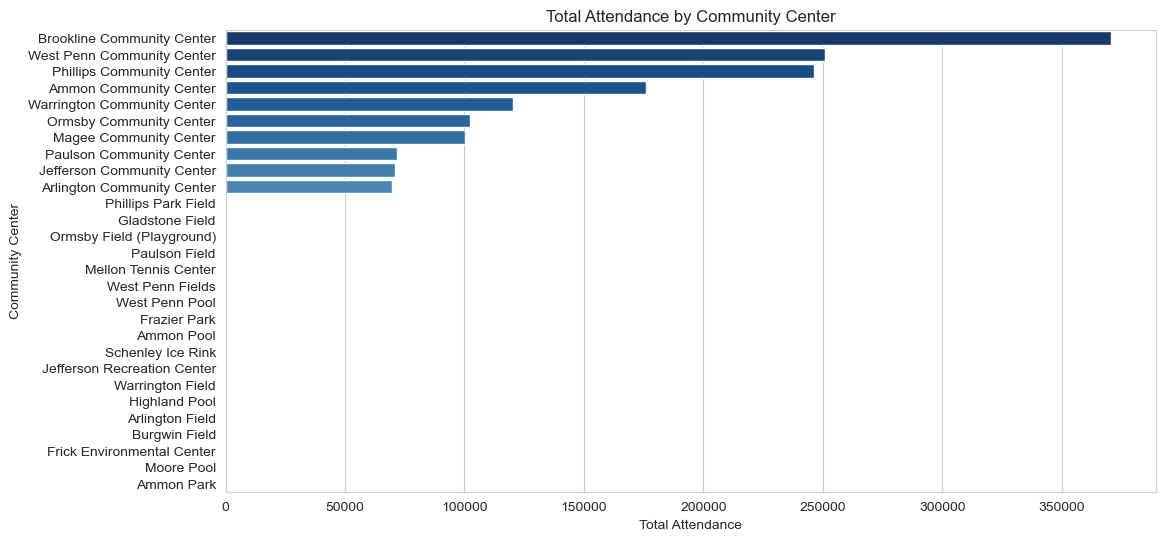

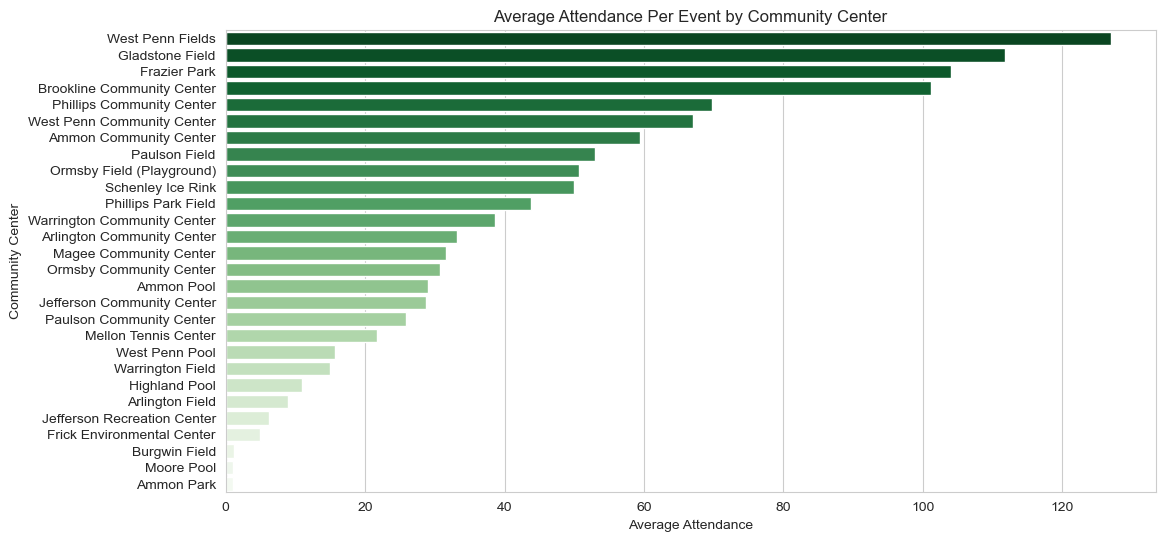

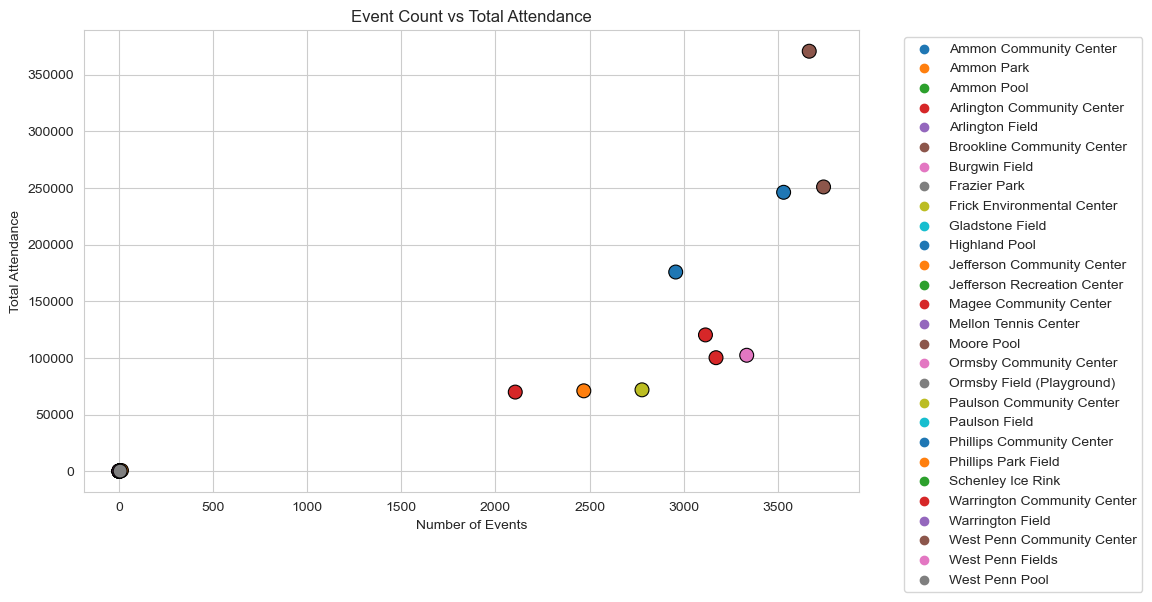

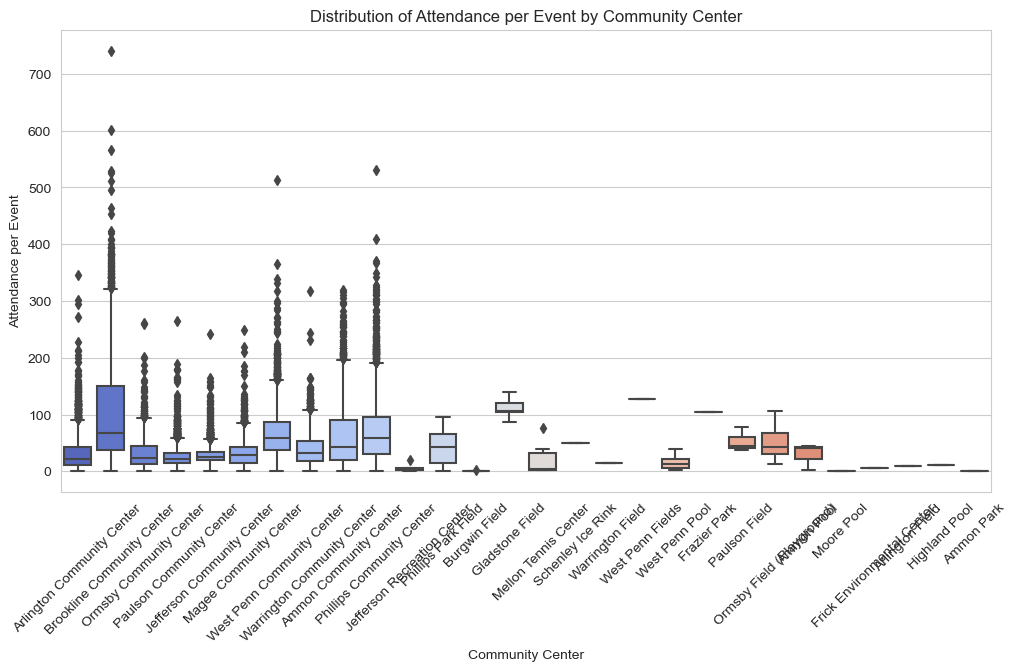

In [15]:
# Strip any leading or trailing spaces in column names
df.columns = df.columns.str.strip()

# Summarize attendance per community center
attendance_summary = df.groupby('center_name')['attendance_count'].agg(['sum', 'mean', 'count']).reset_index()
attendance_summary = attendance_summary.rename(columns={'sum': 'Total Attendance', 'mean': 'Average Attendance', 'count': 'Event Count'})

# Set style
sns.set_style("whitegrid")

# Bar plot - Total Attendance per Community Center
plt.figure(figsize=(12,6))
sns.barplot(y='center_name', x='Total Attendance', data=attendance_summary.sort_values(by='Total Attendance', ascending=False), palette='Blues_r')
plt.title('Total Attendance by Community Center')
plt.xlabel('Total Attendance')
plt.ylabel('Community Center')
plt.show()

# Bar plot - Average Attendance per Event
plt.figure(figsize=(12,6))
sns.barplot(y='center_name', x='Average Attendance', data=attendance_summary.sort_values(by='Average Attendance', ascending=False), palette='Greens_r')
plt.title('Average Attendance Per Event by Community Center')
plt.xlabel('Average Attendance')
plt.ylabel('Community Center')
plt.show()

# Scatter plot - Event Count vs Total Attendance
plt.figure(figsize=(10,6))
sns.scatterplot(x='Event Count', y='Total Attendance', data=attendance_summary, hue='center_name', palette='tab10', s=100, edgecolor='black')
plt.title('Event Count vs Total Attendance')
plt.xlabel('Number of Events')
plt.ylabel('Total Attendance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Box plot - Distribution of Attendance per Event
plt.figure(figsize=(12,6))
sns.boxplot(x='center_name', y='attendance_count', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Distribution of Attendance per Event by Community Center')
plt.xlabel('Community Center')
plt.ylabel('Attendance per Event')
plt.show()

In [16]:
# Top 5 community centers by total attendance using pandas
attendance_summary[['center_name', 'Total Attendance']].sort_values('Total Attendance', ascending=False).head(5)


,center_name,Total Attendance
5,Brookline Community Center,370764
25,West Penn Community Center,250946
20,Phillips Community Center,246238
0,Ammon Community Center,175846
23,Warrington Community Center,120332


### Public School Education IEP Analysis

Using the Pittsburgh Public Schools IEP dataset, we calculated the percentage of gifted students and students with other IEP classifications in each neighborhood. We then created a weighted education score — 60% gifted and 40% IEP — to reflect both advanced educational opportunities and support for special needs. Our analysis used pandas to rank neighborhoods by this score and visualize key patterns. Bar charts revealed the top and bottom 10 neighborhoods by education quality, while a histogram showed that most neighborhoods clustered around a mid-range score. A scatter plot of gifted vs. IEP percentages highlighted how neighborhoods differ in their educational profiles. Finally, a ranking of the top 15 neighborhoods by education score offered a clear snapshot of where student support and enrichment appear strongest.


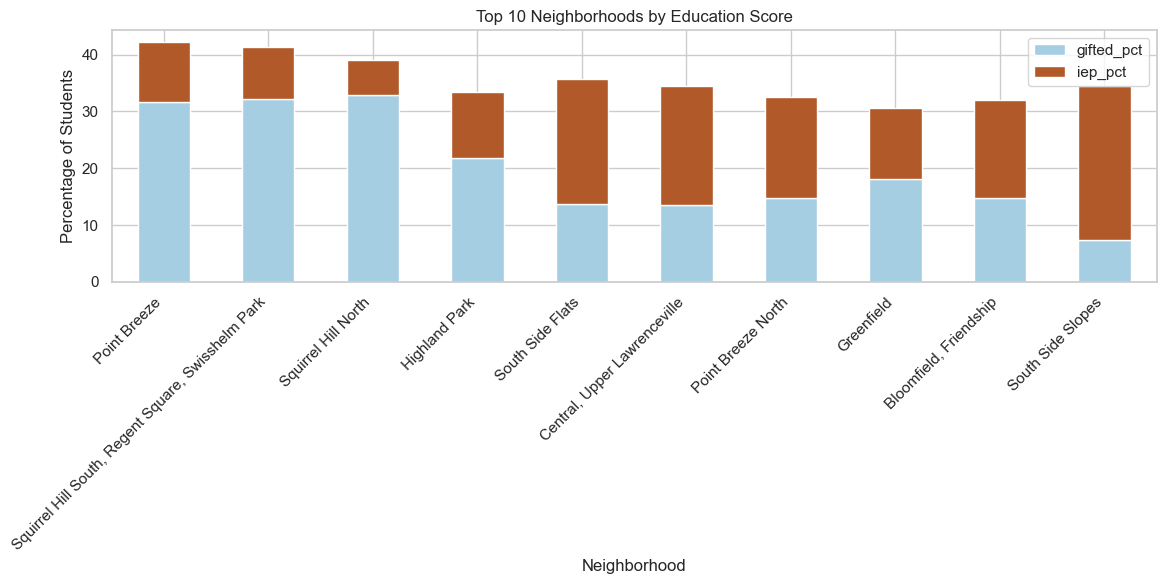

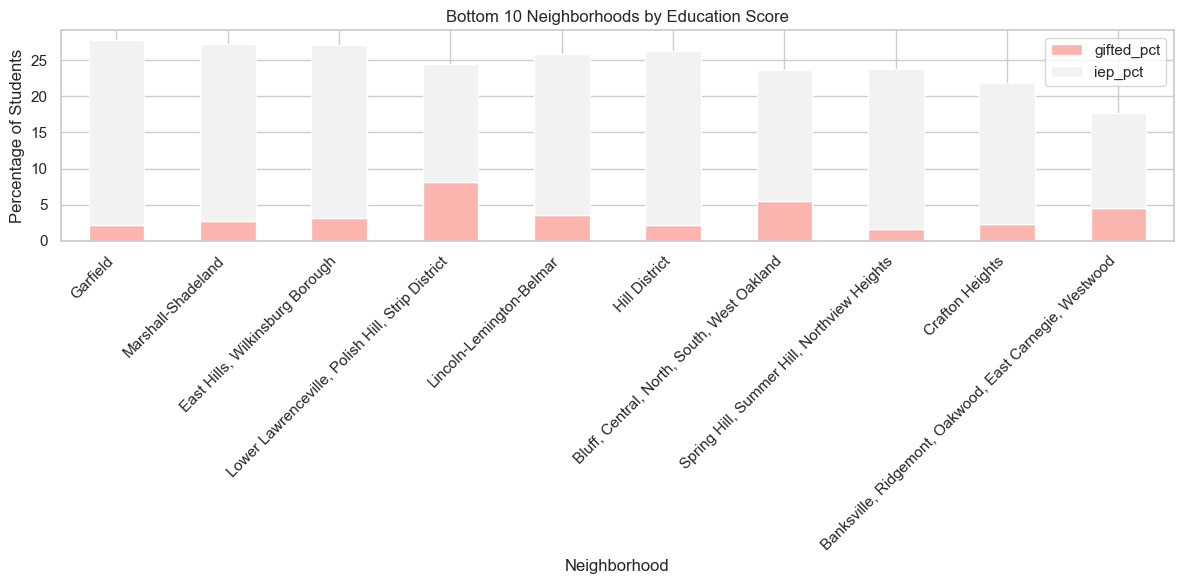

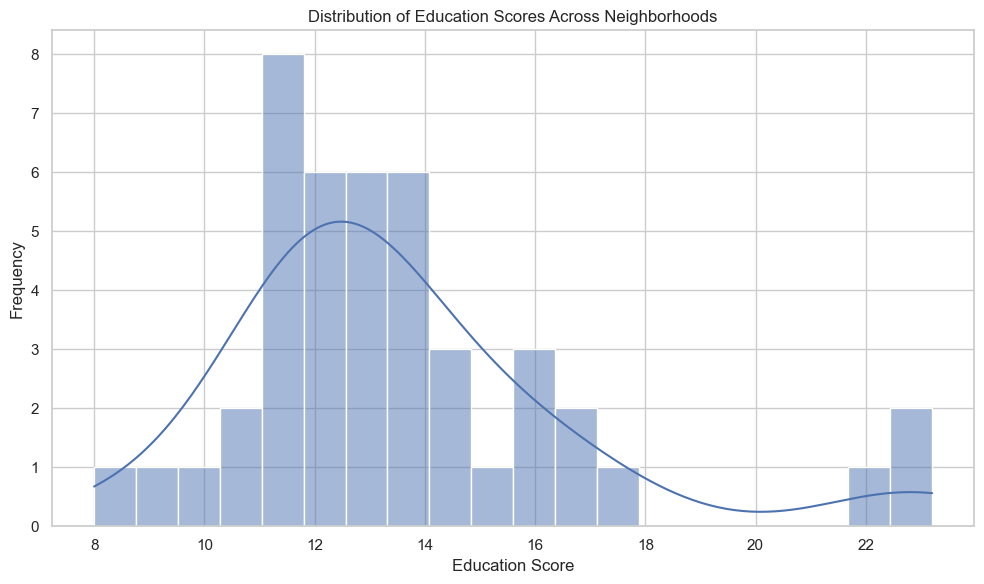

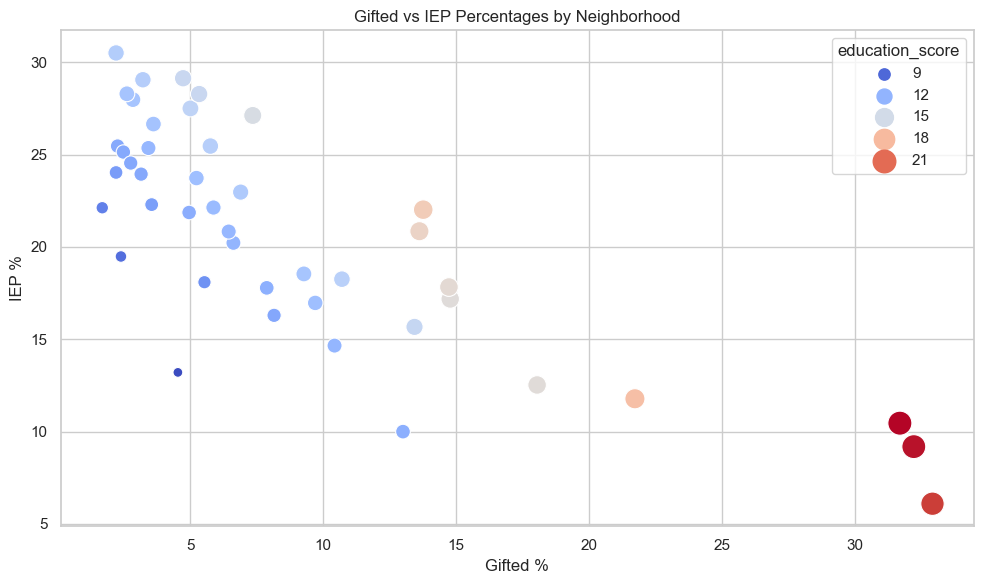

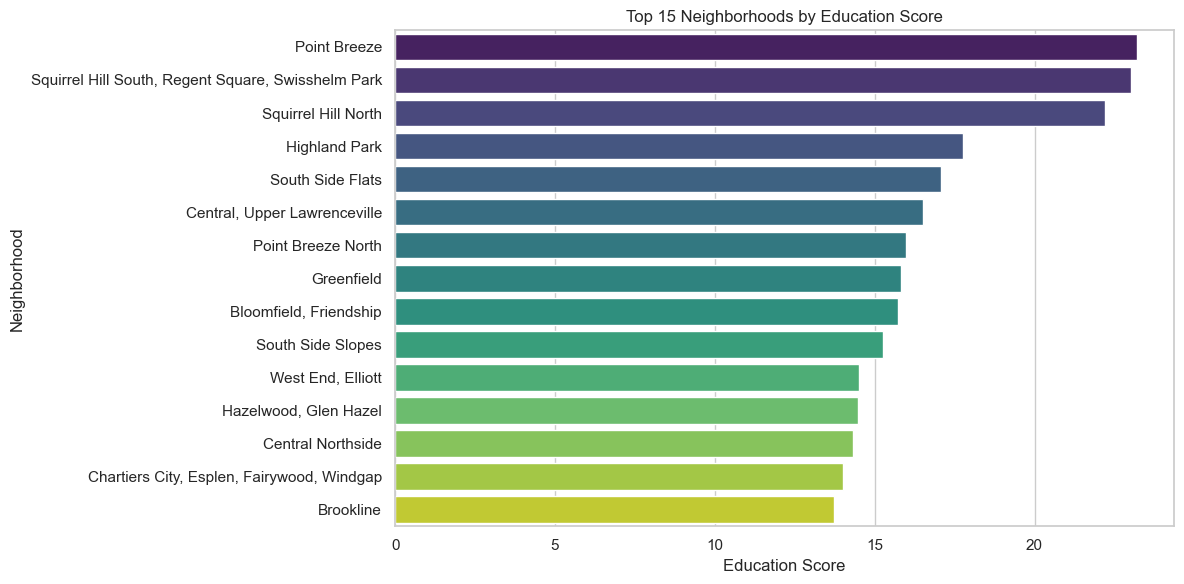

In [17]:


# Calculate percentage columns
cf['gifted_pct'] = (cf['gifted'] / cf['total_enrollment_k_12']) * 100
cf['iep_pct'] = (cf['other_iep'] / cf['total_enrollment_k_12']) * 100
cf['regular_pct'] = (cf['not_iep_or_gifted'] / cf['total_enrollment_k_12']) * 100

# Create weighted education score
cf['education_score'] = (cf['gifted_pct'] * 0.6) + (cf['iep_pct'] * 0.4)

# Sort data
sorted_cf = cf.sort_values('education_score', ascending=False)
top_10 = sorted_cf[['neighborhoods', 'gifted_pct', 'iep_pct', 'education_score']].head(10)
bottom_10 = sorted_cf[['neighborhoods', 'gifted_pct', 'iep_pct', 'education_score']].tail(10)

# Set seaborn style
sns.set(style="whitegrid")

# Plot 1: Top 10 stacked bar chart
top_10.set_index('neighborhoods')[['gifted_pct', 'iep_pct']].plot(
    kind='bar', stacked=True, colormap='Paired', figsize=(12, 6))
plt.title('Top 10 Neighborhoods by Education Score')
plt.ylabel('Percentage of Students')
plt.xlabel('Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot 2: Bottom 10 stacked bar chart
bottom_10.set_index('neighborhoods')[['gifted_pct', 'iep_pct']].plot(
    kind='bar', stacked=True, colormap='Pastel1', figsize=(12, 6))
plt.title('Bottom 10 Neighborhoods by Education Score')
plt.ylabel('Percentage of Students')
plt.xlabel('Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot 3: Histogram of education scores
plt.figure(figsize=(10, 6))
sns.histplot(cf['education_score'], kde=True, bins=20)
plt.title('Distribution of Education Scores Across Neighborhoods')
plt.xlabel('Education Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot 4: Scatter plot of Gifted vs IEP
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=cf,
    x='gifted_pct',
    y='iep_pct',
    hue='education_score',
    palette='coolwarm',
    size='education_score',
    sizes=(50, 300)
)
plt.title('Gifted vs IEP Percentages by Neighborhood')
plt.xlabel('Gifted %')
plt.ylabel('IEP %')
plt.tight_layout()
plt.show()

# Plot 5: Bar chart of top 15 neighborhoods by education score
plt.figure(figsize=(12, 6))
sns.barplot(
    x='education_score',
    y='neighborhoods',
    data=sorted_cf.head(15),
    palette='viridis'
)
plt.title('Top 15 Neighborhoods by Education Score')
plt.xlabel('Education Score')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()


### Combining the two datasets

In [18]:
# Step 1: Clean and summarize attendance data
df.columns = df.columns.str.strip()
attendance_summary = df.groupby('center_name')['attendance_count'].sum().reset_index()
attendance_summary = attendance_summary.rename(columns={'attendance_count': 'Total Attendance'})

# Step 2: Map centers to neighborhoods
center_to_neighborhood = {
    'Ammon Community Center': 'hill district',
    'Ammon Park': 'hill district',
    'Ammon Pool': 'hill district',
    'Arlington Community Center': 'arlington',
    'Arlington Field': 'arlington',
    'Brookline Community Center': 'brookline',
    'Burgwin Field': 'hazelwood',
    'Frazier Park': 'northside',
    'Frick Environmental Center': 'squirrel hill north',
    'Gladstone Field': 'hazelwood',
    'Highland Pool': 'highland park',
    'Jefferson Community Center': 'northside',
    'Jefferson Recreation Center': 'northside',
    'Magee Community Center': 'greenfield',
    'Mellon Tennis Center': 'shadyside',
    'Moore Pool': 'brookline',
    'Ormsby Community Center': 'south side',
    'Ormsby Field (Playground)': 'south side',
    'Paulson Community Center': 'lincoln-lemington-belmar',
    'Paulson Field': 'lincoln-lemington-belmar',
    'Phillips Community Center': 'carrick',
    'Phillips Park Field': 'carrick',
    'Schenley Ice Rink': 'oakland',
    'Warrington Community Center': 'allentown',
    'Warrington Field': 'allentown',
    'West Penn Community Center': 'bloomfield',
    'West Penn Fields': 'bloomfield',
    'West Penn Pool': 'bloomfield'
}
attendance_summary['neighborhood'] = attendance_summary['center_name'].map(center_to_neighborhood)

# Step 3: Aggregate total attendance by neighborhood
neighborhood_attendance = attendance_summary.groupby('neighborhood')['Total Attendance'].sum().reset_index()

# Step 4: Normalize attendance for scoring
neighborhood_attendance['normalized_attendance'] = (
    (neighborhood_attendance['Total Attendance'] - neighborhood_attendance['Total Attendance'].min()) /
    (neighborhood_attendance['Total Attendance'].max() - neighborhood_attendance['Total Attendance'].min())
)

# Step 5: Process education data from `cf`
cf['neighborhood'] = cf['neighborhoods'].str.lower().str.strip()
cf['gifted_pct'] = (cf['gifted'] / cf['total_enrollment_k_12']) * 100
cf['iep_pct'] = (cf['other_iep'] / cf['total_enrollment_k_12']) * 100
cf['education_score'] = (cf['gifted_pct'] * 0.6) + (cf['iep_pct'] * 0.4)

# Step 6: Merge attendance and education data
combined_df = pd.merge(neighborhood_attendance, cf, on='neighborhood', how='inner')

# Step 7: Compute final combined score
combined_df['combined_score'] = (
    combined_df['normalized_attendance'] * 0.5 + (combined_df['education_score'] / 100) * 0.5
)

# Step 8: Display top neighborhoods
top_combined = combined_df.sort_values('combined_score', ascending=False)[
    ['neighborhood', 'Total Attendance', 'education_score', 'combined_score']
].head(10)

top_combined


,neighborhood,Total Attendance,education_score,combined_score
0,brookline,370765,13.723022,0.568615
1,carrick,246852,11.716172,0.391474
4,hill district,175934,10.933099,0.291920
2,greenfield,100216,15.838641,0.214336
5,lincoln-lemington-belmar,72007,11.041667,0.152309
7,squirrel hill north,5,22.195122,0.110976
3,highland park,11,17.748691,0.088752
6,shadyside,130,11.800000,0.059169


## Traffic Safety Metric: Neighborhood-Level Analysis

To assess traffic-related safety and walkability across neighborhoods, we used the "Traffic Count Data" dataset from the WPRDC. This dataset includes average daily car traffic, speed limits, and speed violations, along with the associated neighborhood for each monitoring point.

### Our Processing Steps:

1. **Filter for valid entries** — We removed records with missing neighborhood or traffic count data to ensure accuracy.
2. **Aggregate by neighborhood** — We calculated the average daily car traffic per neighborhood and averaged key speed indicators like median speed and percent over the limit.
3. **Normalize the metrics** — Higher traffic and excessive speeding often reduce walkability and pedestrian safety, so we inverted and normalized these metrics to align lower traffic with better safety scores.
4. **Create a safety score** — We combined traffic volume and speeding metrics into a single "safety score" per neighborhood.
5. **Visualize the results** — Bar charts and distributions help reveal which neighborhoods are the most and least traffic-safe according to our metric.

This metric adds a critical dimension to our overall assessment of “best neighborhood” by emphasizing safe streets and reduced car dependence.


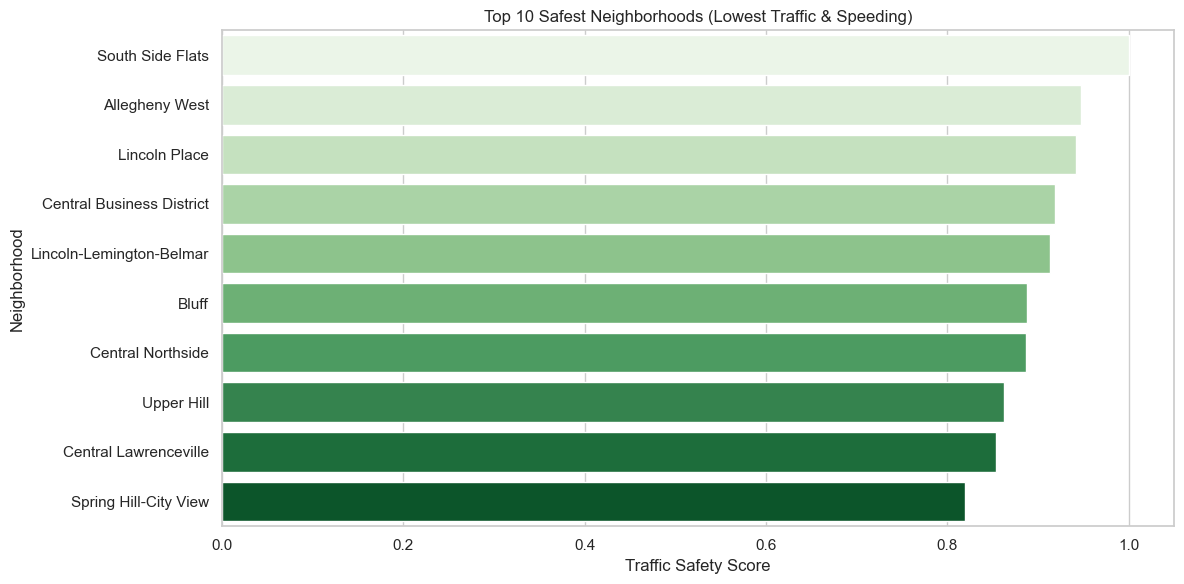

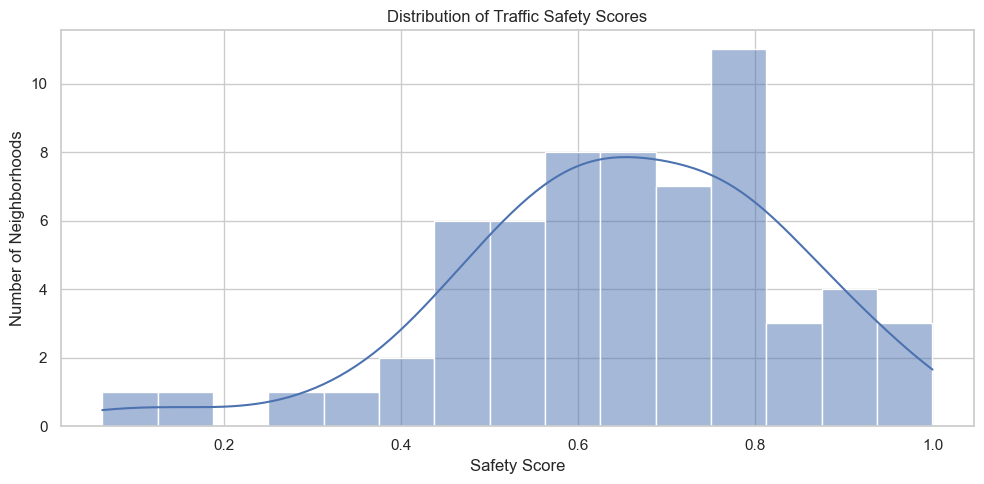

In [23]:
# Step 1: Filter valid rows with neighborhood and traffic info
traffic = af.copy()
traffic = traffic[['neighborhood', 'average_daily_car_traffic', 'median_speed', 'percent_over_limit']]
traffic = traffic.dropna(subset=['neighborhood', 'average_daily_car_traffic'])

# Step 2: Group and aggregate by neighborhood
traffic_grouped = traffic.groupby('neighborhood').agg({
    'average_daily_car_traffic': 'mean',
    'median_speed': 'mean',
    'percent_over_limit': 'mean'
}).reset_index()

# Step 3: Normalize metrics (lower traffic and less speeding = safer)
for col in ['average_daily_car_traffic', 'percent_over_limit']:
    max_val = traffic_grouped[col].max()
    min_val = traffic_grouped[col].min()
    traffic_grouped[f'{col}_norm'] = 1 - ((traffic_grouped[col] - min_val) / (max_val - min_val))

# Step 4: Create a composite safety score (equal weight)
traffic_grouped['safety_score'] = (
    traffic_grouped['average_daily_car_traffic_norm'] * 0.5 +
    traffic_grouped['percent_over_limit_norm'] * 0.5
)



# Step 5: Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart of top 10 safest neighborhoods
plt.figure(figsize=(12, 6))
sns.barplot(x='safety_score', y='neighborhood', data=top_safe, palette='Greens')
plt.title('Top 10 Safest Neighborhoods (Lowest Traffic & Speeding)')
plt.xlabel('Traffic Safety Score')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()

# Histogram of all safety scores
plt.figure(figsize=(10, 5))
sns.histplot(traffic_grouped['safety_score'], bins=15, kde=True)
plt.title('Distribution of Traffic Safety Scores')
plt.xlabel('Safety Score')
plt.ylabel('Number of Neighborhoods')
plt.tight_layout()
plt.show()


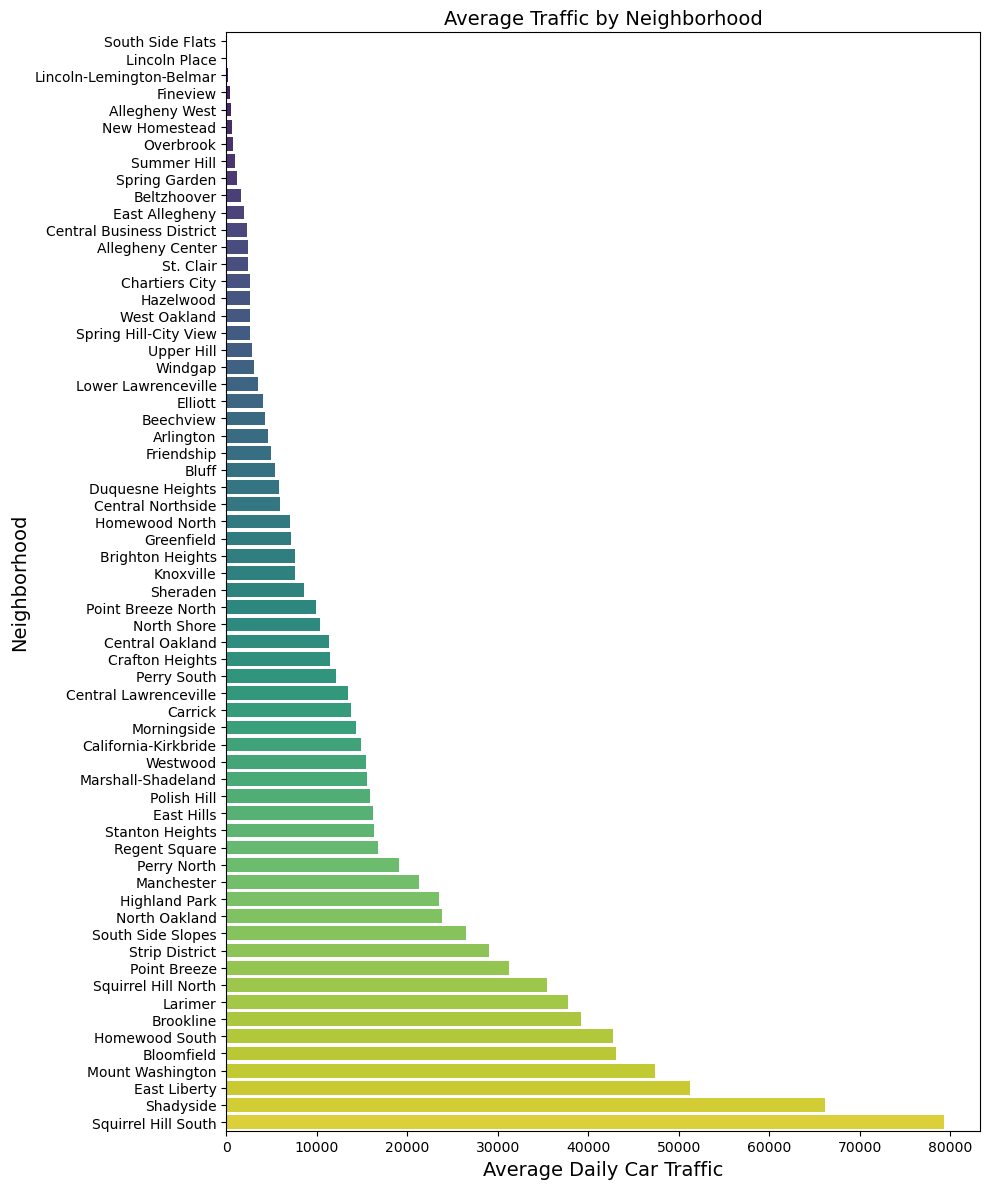

In [11]:
#Average traffic volume visualization
traffic_stats = pd.read_csv("traffic.csv").dropna(subset=["neighborhood", "average_daily_car_traffic"])
avg_traffic = traffic_stats.groupby('neighborhood')['average_daily_car_traffic'].sum().reset_index()

plt.figure(figsize=(10, 12))
sns.barplot(data=avg_traffic.sort_values(by="average_daily_car_traffic", ascending=True), y="neighborhood", x="average_daily_car_traffic", palette="viridis", errorbar=None)
plt.title('Average Traffic by Neighborhood', fontsize=14)
plt.xlabel('Average Daily Car Traffic', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)
plt.tight_layout()



In [22]:
# Step 1: Clean and subset relevant columns
traffic = af[['neighborhood', 'average_daily_car_traffic', 'median_speed', 'percent_over_limit']].copy()
traffic = traffic.dropna(subset=['neighborhood', 'average_daily_car_traffic'])

# Step 2: Group by neighborhood and aggregate means
traffic_grouped = (
    traffic
    .groupby('neighborhood', as_index=False)
    .agg({
        'average_daily_car_traffic': 'mean',
        'median_speed': 'mean',
        'percent_over_limit': 'mean'
    })
)

# Step 3: Normalize car traffic and percent over limit (lower = safer)
traffic_grouped['car_traffic_norm'] = 1 - (
    (traffic_grouped['average_daily_car_traffic'] - traffic_grouped['average_daily_car_traffic'].min()) /
    (traffic_grouped['average_daily_car_traffic'].max() - traffic_grouped['average_daily_car_traffic'].min())
)

traffic_grouped['speeding_norm'] = 1 - (
    (traffic_grouped['percent_over_limit'] - traffic_grouped['percent_over_limit'].min()) /
    (traffic_grouped['percent_over_limit'].max() - traffic_grouped['percent_over_limit'].min())
)

# Step 4: Create safety score (equal weight)
traffic_grouped['safety_score'] = (traffic_grouped['car_traffic_norm'] + traffic_grouped['speeding_norm']) / 2

# Step 5: Top 5 safest neighborhoods
top5_safe = traffic_grouped.sort_values('safety_score', ascending=False).head(5)
top5_safe[['neighborhood', 'average_daily_car_traffic', 'percent_over_limit', 'safety_score']]


,neighborhood,average_daily_car_traffic,percent_over_limit,safety_score
50,South Side Flats,115.0,3.0,1.000000
1,Allegheny West,477.0,11.0,0.947000
31,Lincoln Place,126.0,14.0,0.941774
11,Central Business District,2305.0,6.0,0.918302
32,Lincoln-Lemington-Belmar,195.0,19.0,0.913382


### Combining all three datasets

## Final Metric: Best Neighborhoods in Pittsburgh (Full Dataset Integration)

We combined three different metrics from the WPRDC to identify the best neighborhoods in Pittsburgh:

1. **Community Engagement**  
   Based on normalized attendance at community centers, mapped to neighborhoods.

2. **Education Score**  
   A weighted average of gifted (60%) and IEP (40%) student percentages for each neighborhood.

3. **Traffic Safety**  
   Derived from average daily traffic and percentage of vehicles speeding. Lower values = safer streets.

---

### Combining Metrics

Each metric was scaled to a 0–1 range and averaged evenly:
- Normalized Attendance (0–1)
- Education Score (scaled to 0–1)
- Safety Score (0–1)

To ensure a comprehensive comparison, we **included neighborhoods even if one metric was missing**, using a neutral average of `0.5` for missing values. This allows for broader ranking while acknowledging gaps in the data.

---

### Visualizations

- **Bar Chart:** Final scores for the top 10 neighborhoods
- **Stacked Bar Chart:** Breakdown of each score component per neighborhood

---

### Outcome

This combined analysis identifies the most well-rounded neighborhoods—those with engaged communities, supportive education, and safe streets. It also highlights where better data coverage could improve future rankings.


In [34]:
import pandas as pd

# Recalculate attendance summary
attendance_summary = df.groupby('center_name')['attendance_count'].sum().reset_index()
attendance_summary['neighborhood'] = attendance_summary['center_name'].map(center_to_neighborhood)

neighborhood_attendance = attendance_summary.groupby('neighborhood')['attendance_count'].sum().reset_index()
neighborhood_attendance = neighborhood_attendance.rename(columns={'attendance_count': 'Total Attendance'})

# Normalize attendance
neighborhood_attendance['normalized_attendance'] = (
    (neighborhood_attendance['Total Attendance'] - neighborhood_attendance['Total Attendance'].min()) /
    (neighborhood_attendance['Total Attendance'].max() - neighborhood_attendance['Total Attendance'].min())
)

# Build full list of neighborhoods
all_neighs = sorted(
    set(neighborhood_attendance['neighborhood']) |
    set(cf['neighborhood']) |
    set(traffic_grouped['neighborhood'])
)
final_scores = pd.DataFrame({'neighborhood': all_neighs})

# Merge in metrics
final_scores = final_scores.merge(
    neighborhood_attendance[['neighborhood', 'normalized_attendance']],
    on='neighborhood', how='left'
)
final_scores = final_scores.merge(
    cf[['neighborhood', 'education_score']],
    on='neighborhood', how='left'
)
final_scores = final_scores.merge(
    traffic_grouped[['neighborhood', 'safety_score']],
    on='neighborhood', how='left'
)

# Fill missing with neutral values
final_scores['normalized_attendance'] = final_scores['normalized_attendance'].fillna(0.5)
final_scores['education_score'] = final_scores['education_score'].fillna(50)
final_scores['safety_score'] = final_scores['safety_score'].fillna(0.5)

# Final combined score
final_scores['final_score'] = (
    final_scores['normalized_attendance'] * (1/3) +
    (final_scores['education_score'] / 100) * (1/3) +
    final_scores['safety_score'] * (1/3)
)

# Show top 10
top10 = final_scores.sort_values('final_score', ascending=False).head(10)
top10


,neighborhood,normalized_attendance,education_score,safety_score,final_score
49,South Side Flats,0.5,50.0,1.000000,0.666667
1,Allegheny West,0.5,50.0,0.947000,0.649000
30,Lincoln Place,0.5,50.0,0.941774,0.647258
10,Central Business District,0.5,50.0,0.918302,0.639434
31,Lincoln-Lemington-Belmar,0.5,50.0,0.913382,0.637794
5,Bluff,0.5,50.0,0.888237,0.629412
12,Central Northside,0.5,50.0,0.886625,0.628875
28,Knoxville,0.5,50.0,0.871811,0.623937
58,Upper Hill,0.5,50.0,0.862490,0.620830
11,Central Lawrenceville,0.5,50.0,0.854173,0.618058


### Conclusion
After combining data from community center attendance, education quality, and traffic safety, we identified the top neighborhood in Pittsburgh to be South Side using a balanced metric. Each neighborhood’s final score reflects its performance in community engagement, support for student development, and street-level safety. To ensure broader coverage, we included neighborhoods that were missing data in one category by assigning them a neutral average score. This allowed for a more inclusive and realistic comparison. Our results suggest that the best neighborhoods are not only active and supportive of education, but also provide a safe environment for residents. While this analysis gives a strong starting point, future versions could be improved by expanding data coverage and incorporating additional factors such as air quality, housing affordability, or access to parks. 

### Conclusion
While analyzing data from Pittsburgh neighborhoods, we came to the conclusion that South Side was the top neighborhood. Our results show that the strongest neighborhoods support education, community engagement, and safety. The project showed how objective data can highlight strengths that may not always match personal preferences.